https://twitter.com/rtafds/status/1665041067048329219

  1.321891 seconds (1.99 M allocations: 220.395 MiB, 4.01% gc time, 3.14% compilation time)
  1.155416 seconds (1.79 M allocations: 92.381 MiB, 3.15% gc time, 1.14% compilation time)
  0.101206 seconds (171.77 k allocations: 11.326 MiB, 96.74% compilation time)
  5.073001 seconds (9.53 M allocations: 641.929 MiB, 4.80% gc time, 99.87% compilation time)
  0.351004 seconds (406.92 k allocations: 26.838 MiB, 4.18% gc time, 98.73% compilation time: 39% of which was recompilation)
  0.521310 seconds (663.04 k allocations: 43.084 MiB, 99.67% compilation time: 38% of which was recompilation)


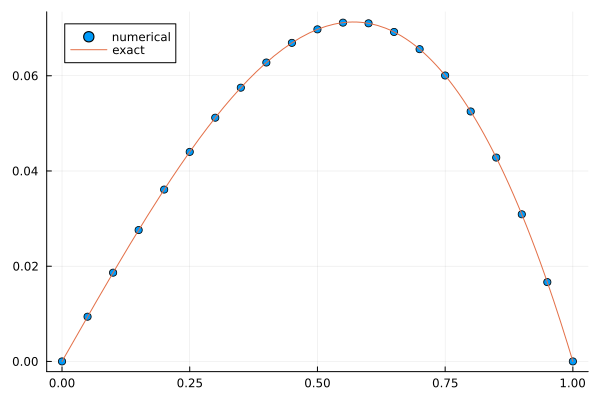

In [1]:
@time using BoundaryValueDiffEq
@time using Plots
default(fmt=:png)

xspan = (0, 1)
initguess = [0.0, 0.0]
param = SciMLBase.NullParameters()

function diffeq!(dy, y, param, x)
    dy[1] = y[2] # dy₁/dx = y₂
    dy[2] = -y[1] - x # dy₂/dx = -y - x
end

function boundarycond!(residual, y, param, x)
    residual[1] = y[begin][1] # y(x_begin) = 0
    residual[2] = y[end][1] # y(x_end) = 0
end

@time bvprob = BVProblem(diffeq!, boundarycond!, initguess, xspan, param)
@time sol = solve(bvprob, GeneralMIRK4(), dt = 0.05)
@time scatter(sol.t, x -> sol(x; idxs=1); label="numerical")
@time plot!(x -> sin(x)/sin(1) - x; label="exact")

In [2]:
sol

retcode: Success
Interpolation: 1st order linear
t: 21-element Vector{Float64}:
 0.0
 0.05
 0.1
 0.15
 0.2
 0.25
 0.3
 0.35
 0.4
 0.45
 0.5
 0.55
 0.6
 0.65
 0.7
 0.75
 0.8
 0.85
 0.9
 0.95
 1.0
u: 21-element Vector{Vector{Float64}}:
 [0.0, 0.1883951124172109]
 [0.009394999965753922, 0.18690992800441503]
 [0.018641543370345393, 0.18245808695313104]
 [0.027591544709126833, 0.17505071654923882]
 [0.03609765967979751, 0.164706331361535]
 [0.04401365347078751, 0.15145078696248482]
 [0.05119476625817355, 0.13531721530420943]
 [0.05749807504397179, 0.11634594191889881]
 [0.06278285088088459, 0.0945843851182908]
 [0.06691091062383513, 0.0700869374453294]
 [0.06974696231532859, 0.04291482976768281]
 [0.07115894334383134, 0.013135978194667325]
 [0.07101835053409511, -0.01917518564384475]
 [0.06920056133689789, -0.05393790067257352]
 [0.06558514532014338, -0.0910652782075585]
 [0.06005616518207722, -0.13046451915433735]
 [0.05250246653396947, -0.17203714592363734]
 [0.04281795573034711, -0.21567

In [3]:
?BVProblem

search: BVProblem TwoPointBVProblem



Defines an BVP problem. Documentation Page: https://docs.sciml.ai/DiffEqDocs/stable/types/bvp_types/

## Mathematical Specification of a BVP Problem

To define a BVP Problem, you simply need to give the function $f$ and the initial condition $u_0$ which define an ODE:

$$
\frac{du}{dt} = f(u,p,t)
$$

along with an implicit function `bc!` which defines the residual equation, where

$$
bc(u,p,t) = 0
$$

is the manifold on which the solution must live. A common form for this is the two-point `BVProblem` where the manifold defines the solution at two points:

$$
u(t_0) = a
u(t_f) = b
$$

## Problem Type

### Constructors

```julia
TwoPointBVProblem{isinplace}(f,bc!,u0,tspan,p=NullParameters();kwargs...)
BVProblem{isinplace}(f,bc!,u0,tspan,p=NullParameters();kwargs...)
```

For any BVP problem type, `bc!` is the inplace function:

```julia
bc!(residual, u, p, t)
```

where `residual` computed from the current `u`. `u` is an array of solution values where `u[i]` is at time `t[i]`, while `p` are the parameters. For a `TwoPointBVProblem`, `t = tspan`. For the more general `BVProblem`, `u` can be all of the internal time points, and for shooting type methods `u=sol` the ODE solution. Note that all features of the `ODESolution` are present in this form. In both cases, the size of the residual matches the size of the initial condition.

Parameters are optional, and if not given, then a `NullParameters()` singleton will be used which will throw nice errors if you try to index non-existent parameters. Any extra keyword arguments are passed on to the solvers. For example, if you set a `callback` in the problem, then that `callback` will be added in every solve call.

### Fields

  * `f`: The function for the ODE.
  * `bc`: The boundary condition function.
  * `u0`: The initial condition. Either the initial condition for the ODE as an initial value problem, or a `Vector` of values for $u(t_i)$ for collocation methods.
  * `tspan`: The timespan for the problem.
  * `p`: The parameters for the problem. Defaults to `NullParameters`
  * `kwargs`: The keyword arguments passed onto the solves.


https://docs.sciml.ai/DiffEqDocs/stable/tutorials/bvp_example/

In [4]:
@time using BoundaryValueDiffEq
@time using Plots
default(fmt=:png)

const g = 9.81
L = 1.0
tspan = (0.0, pi / 2)
function simplependulum!(du, u, p, t)
    θ = u[1]
    dθ = u[2]
    du[1] = dθ
    du[2] = -(g / L) * sin(θ)
end

  0.000498 seconds (319 allocations: 21.617 KiB)
  0.000477 seconds (319 allocations: 21.602 KiB)


simplependulum! (generic function with 1 method)

  0.031039 seconds (53.80 k allocations: 3.569 MiB, 98.33% compilation time)
  0.226524 seconds (1.20 M allocations: 73.495 MiB, 9.27% gc time, 71.11% compilation time)
  1.161936 seconds (1.93 M allocations: 132.218 MiB, 2.27% gc time, 99.69% compilation time)


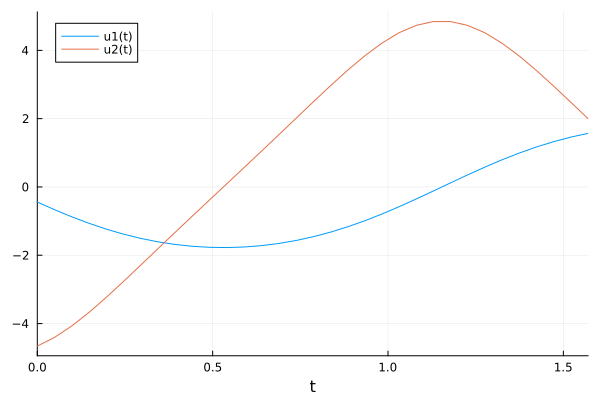

In [5]:
function bc1!(residual, u, p, t)
    residual[1] = u[end ÷ 2][1] + pi / 2 # the solution at the middle of the time span should be -pi/2
    residual[2] = u[end][1] - pi / 2 # the solution at the end of the time span should be pi/2
end
@time bvp1 = BVProblem(simplependulum!, bc1!, [pi / 2, pi / 2], tspan)
@time sol1 = solve(bvp1, GeneralMIRK4(), dt = 0.05)
@time plot(sol1)